In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data\regression.csv')

In [3]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [5]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [6]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [7]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

## Visualise Data


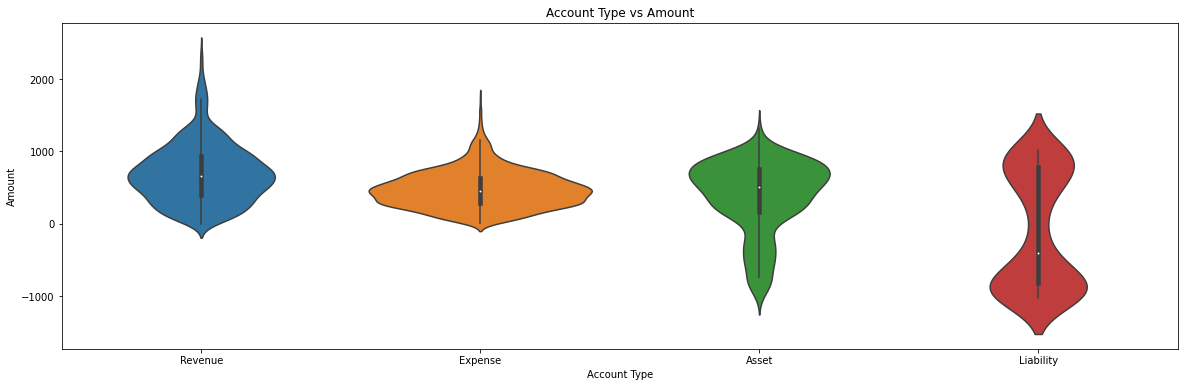

In [9]:
plt.figure(figsize= (20,6))
sns.violinplot(x = df["Account Type"], y = df.Amount)
plt.title("Account Type vs Amount")
plt.show()

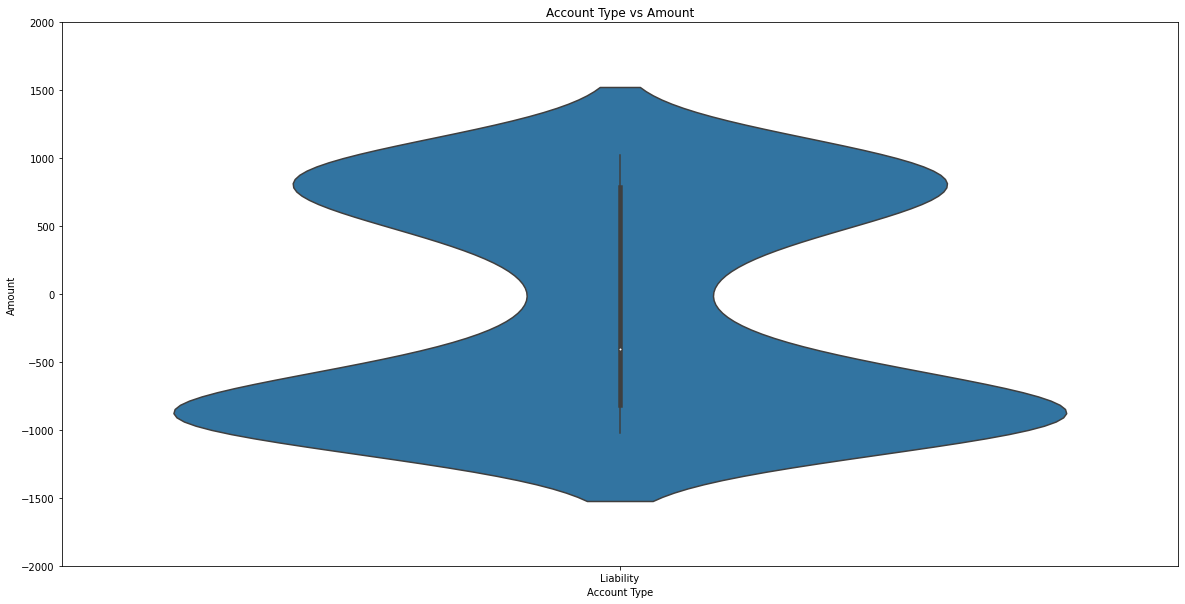

In [10]:
plt.figure(figsize= (20,10))
sns.violinplot(x ="Account Type", y = "Amount", data= df.loc[df['Account Type']=='Liability'])
plt.title("Account Type vs Amount")
plt.ylim((-2000,2000))
plt.show()

In [11]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [8]:
Month = {
    'Jan':1, 
    'Feb':2, 
    'Mar':3, 
    'Apr':4, 
    'May':5, 
    'Jun':6, 
    'Jul':7, 
    'Aug':8, 
    'Sep':9,
    'Oct':10, 
    'Nov':11, 
    'Dec':12
}

In [9]:
df['Period'] = 1

In [10]:
df["Date"] = str(df["Year"]) + "-"+str(df['Month'].apply(lambda x: Month[x])) + "-" + str(df["Period"])

In [11]:
df["Month"] = df["Month"].apply(lambda x: Month[x])

In [12]:
df['Date'] = df["Year"].astype(str)+"-"+ df['Month'].astype(str)+"-"+df['Period'].astype(str)

In [13]:
df.Date = pd.to_datetime(df.Date)

In [14]:
df['Month'] = df.Date.dt.month

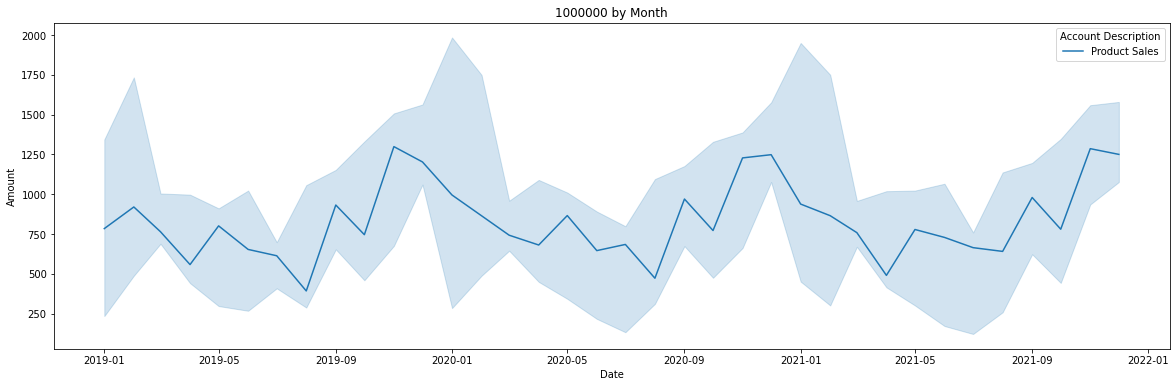

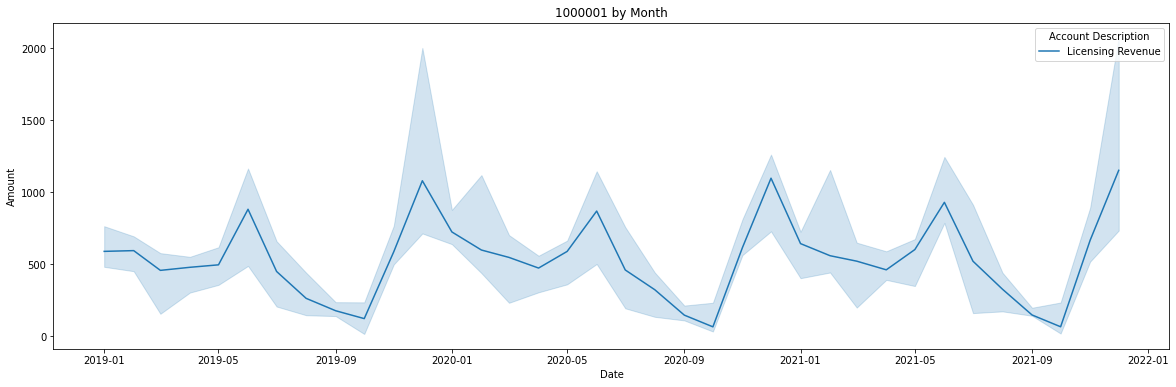

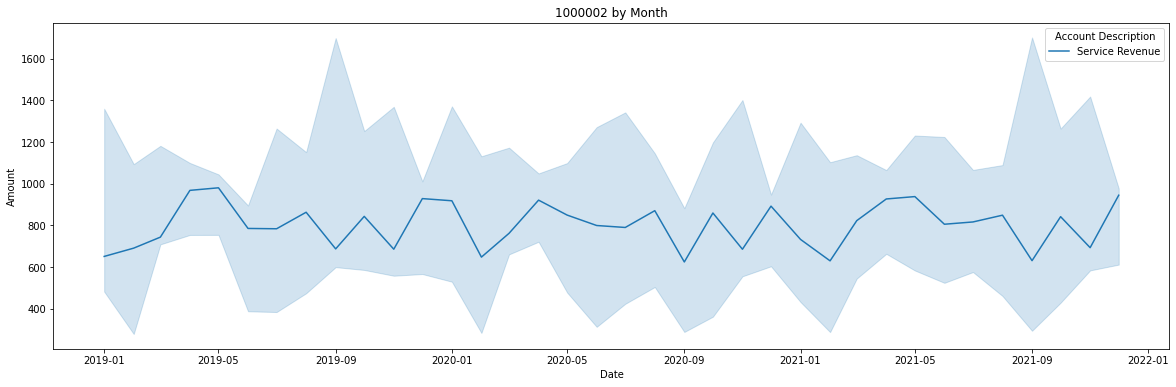

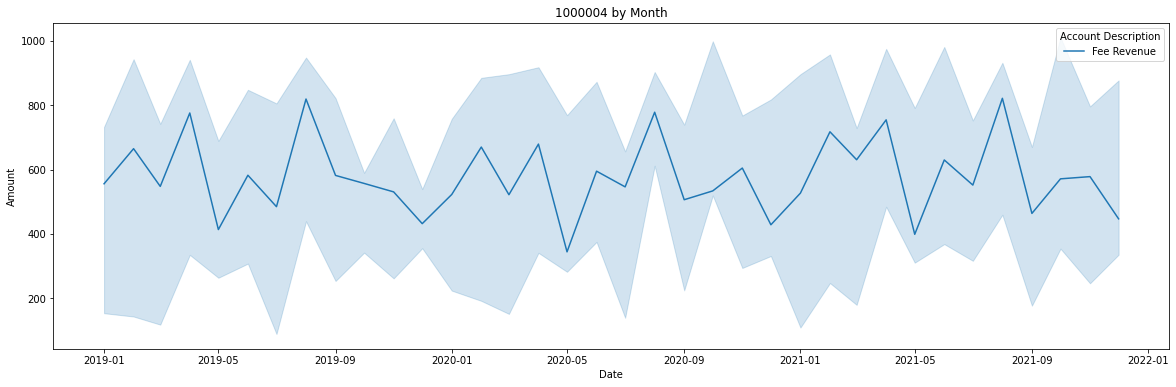

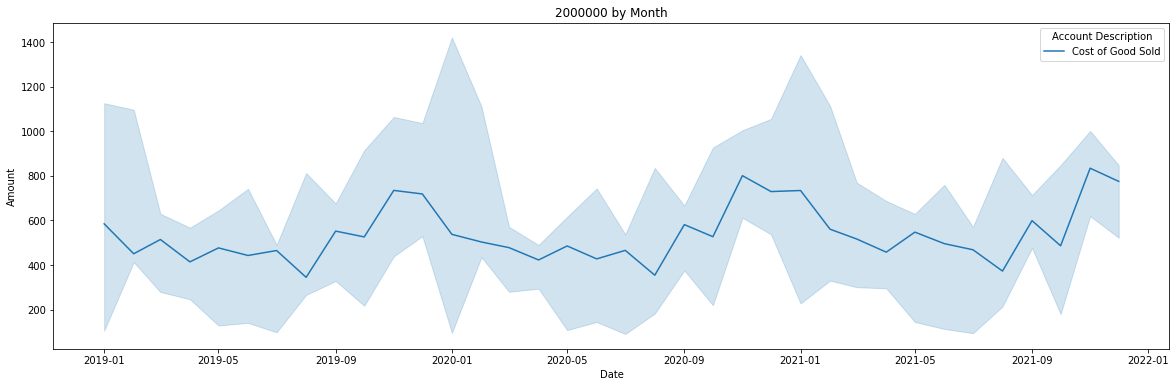

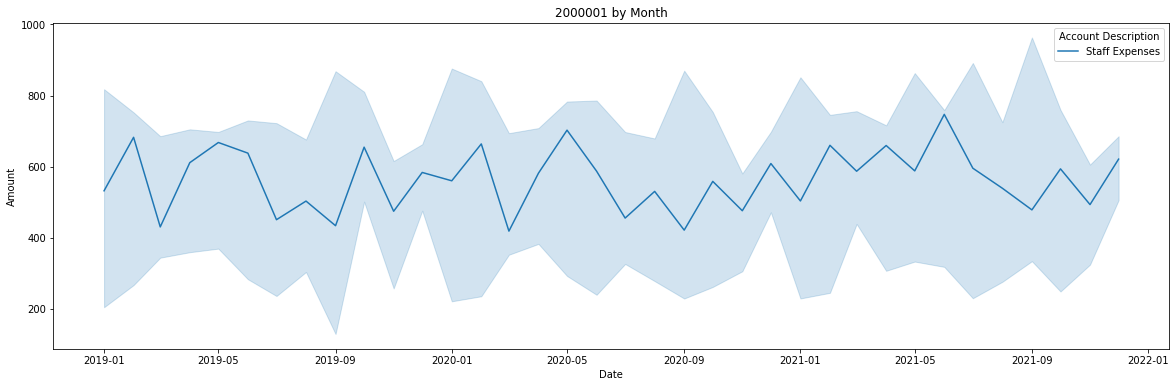

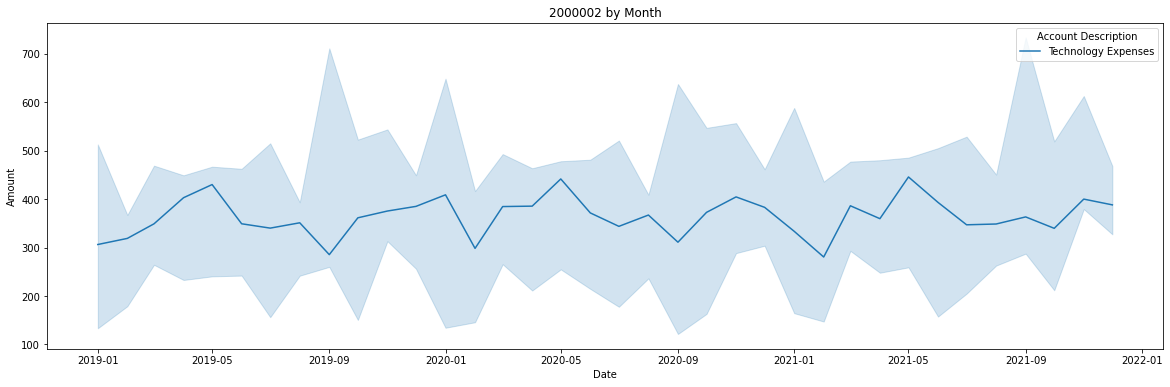

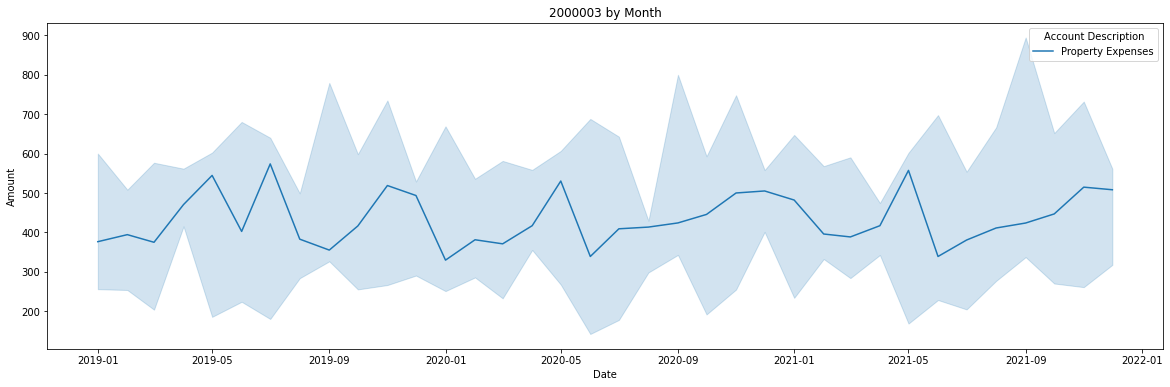

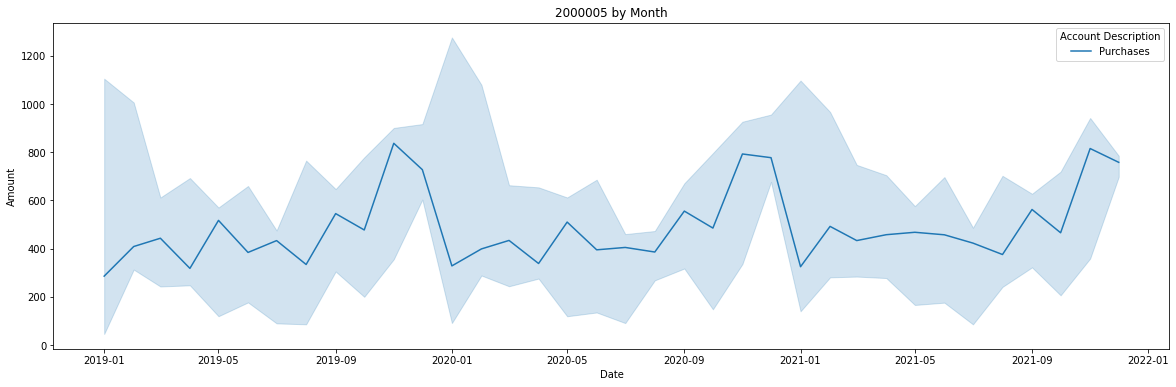

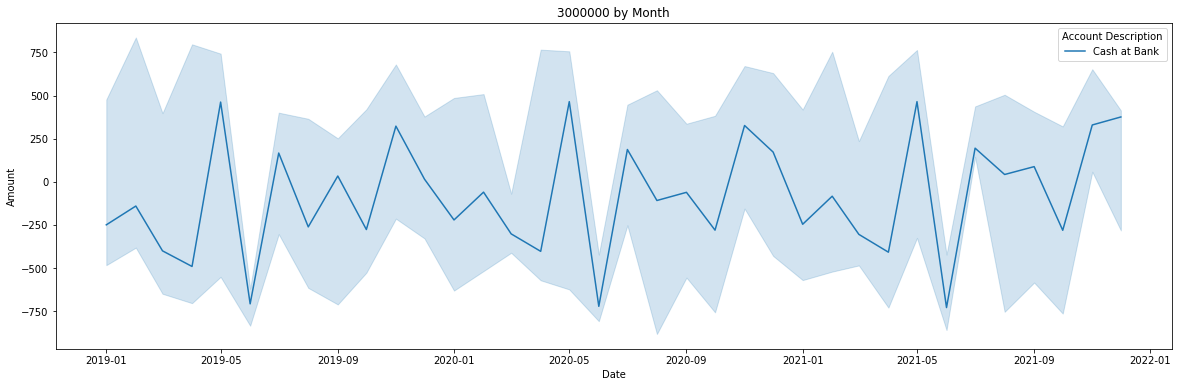

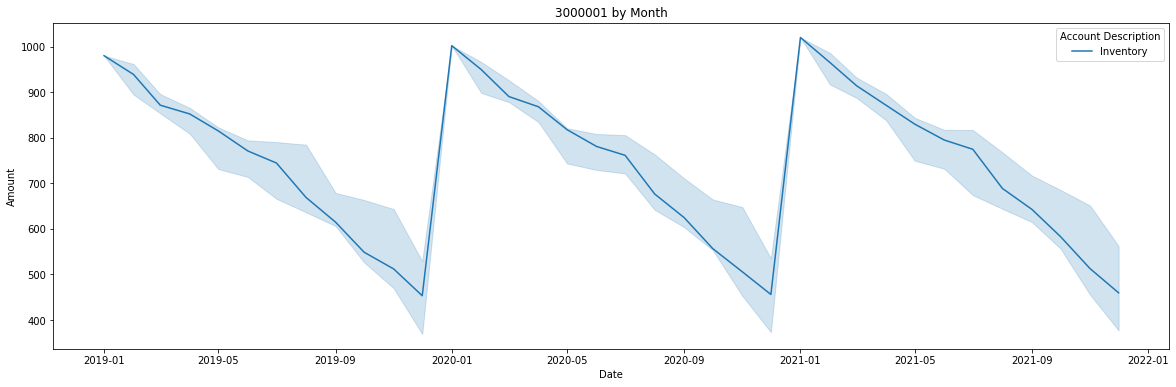

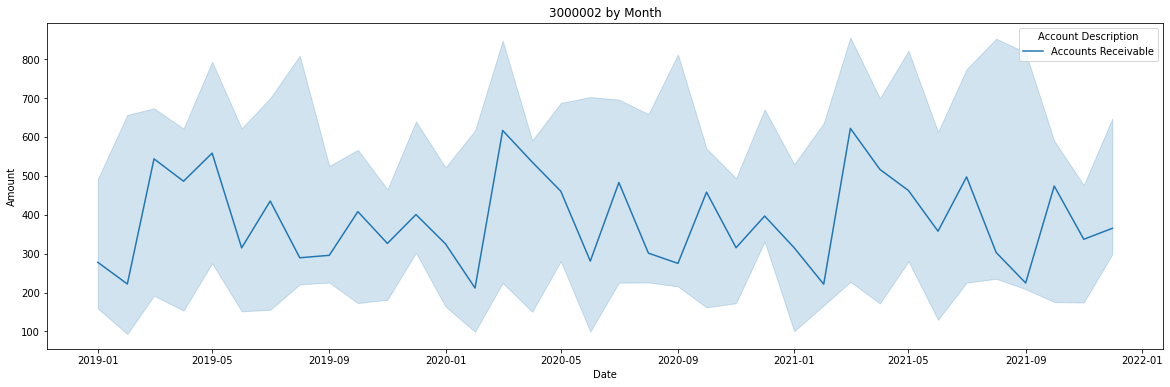

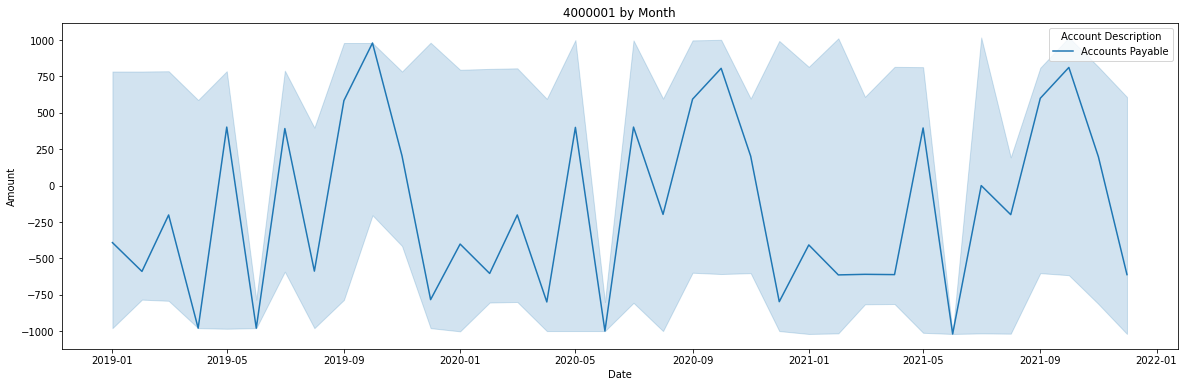

In [20]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

In [15]:
df.drop(['Period', 'Date'], axis = 'columns', inplace= True)

In [16]:
months =  dict([(value,key) for key,value in Month.items()])

In [17]:
df.Month = df.Month.apply(lambda x: months[x])

In [18]:
len(df["Account"].unique())

13

In [19]:
len(df["Account Description"].unique())

13

In [20]:
df["acc"] = df.Account.astype(str) + df['Account Description'].astype(str)

In [21]:
len(df["acc"].unique())

13

In [22]:
df.drop(['Account Description','acc'], axis= "columns", inplace= True)

In [23]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [24]:
df.Year = df.Year.astype(str)

In [25]:
df

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328
...,...,...,...,...,...,...
4207,2021,Dec,CC302,ACC2000005,Expense,698.121
4208,2021,Dec,CC302,ACC3000000,Asset,-282.056
4209,2021,Dec,CC302,ACC3000001,Asset,537.478
4210,2021,Dec,CC302,ACC3000002,Asset,1152.680


In [26]:
df.dtypes

Year             object
Month            object
Cost Centre      object
Account          object
Account Type     object
Amount          float64
dtype: object

## Modelling

In [32]:
X = df.drop('Amount', axis=1)
y = df['Amount']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2948, 5) (1264, 5) (2948,) (1264,)


In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train = encoder.fit_transform(X_train)


In [38]:
X_train

<2948x41 sparse matrix of type '<class 'numpy.float64'>'
	with 14740 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [40]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [41]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [44]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [46]:
from sklearn.metrics import r2_score, mean_absolute_error
for algo,model in fit_models.items():
    yhat = model.predict(encoder.transform(X_test))
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))


rf scores - R2:0.9332586085008214 MAE:76.68549070411395
gb scores - R2:0.6353516501682552 MAE:190.8419509203904
ridge scores - R2:0.5093597258170691 MAE:224.88661260004724
lasso scores - R2:0.5097508613930471 MAE:224.47822751141783
enet scores - R2:0.5086617173444186 MAE:225.02988780517322


In [47]:
best_model = fit_models['rf']

In [49]:
import os
path = os.path.join(os.getcwd(),"saved_models")

if not os.path.exists(path):
    os.mkdir(path)

In [50]:
import joblib
joblib.dump(best_model,os.path.join(path,'best_model'))

['e:\\Projects\\Watson\\saved_models\\best_model']

In [51]:
joblib.dump(encoder,os.path.join(path,'encoder'))

['e:\\Projects\\Watson\\saved_models\\encoder']